In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [1]:
data = pd.read_csv(r'C:\Users\Administrator\Class Notebooks\Datasets\Linear Regression\salary/Salary_Data.csv')

In [2]:
data.head(20)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


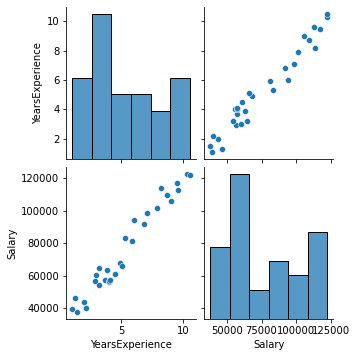

In [8]:
sns.pairplot(data)

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

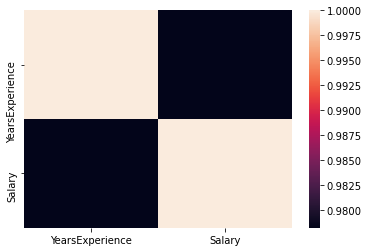

In [11]:
sns.heatmap(data.corr())

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
# Importing the linearregression class
from sklearn.linear_model import LinearRegression

In [32]:
# Creating an object from the class
lm = LinearRegression()
# Training the train set
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
# testing our model with X Test
y_pred = lm.predict(X_test)

In [39]:
# Comparing the Salaries
pd.DataFrame(y_pred, y_test, columns = ['Actual Salary']).reset_index()

,Salary,Actual Salary
0,91738.0,90235.221726
1,109431.0,108172.103010
2,54445.0,56249.551925
3,81363.0,81738.804276
4,37731.0,40200.763408
5,112635.0,116668.520460


In [40]:
measure = pd.DataFrame(y_pred, y_test, columns = ['Actual Salary']).reset_index()

In [42]:
measure['diff'] = measure['Salary'] - measure['Actual Salary']

In [43]:
measure

,Salary,Actual Salary,diff
0,91738.0,90235.221726,1502.778274
1,109431.0,108172.103010,1258.896990
2,54445.0,56249.551925,-1804.551925
3,81363.0,81738.804276,-375.804276
4,37731.0,40200.763408,-2469.763408
5,112635.0,116668.520460,-4033.520460


Text(0, 0.5, 'Salary')

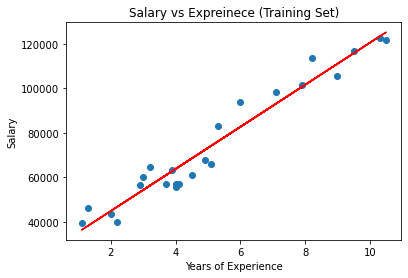

In [48]:
# Visualising the Training Set
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.predict(X_train), color = 'red')
plt.title('Salary vs Expreinece (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

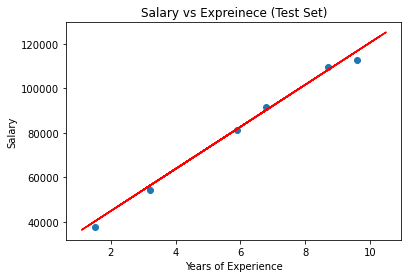

In [49]:
# Visualising the Training Set
plt.scatter(X_test, y_test)
plt.plot(X_train, lm.predict(X_train), color = 'red')
plt.title('Salary vs Expreinece (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [50]:
# Standarization
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaler.fit(X_train)

StandardScaler()

In [53]:
x_scaled = scaler.transform(X_train)

In [54]:
x_scaled

array([[ 1.58013073],
       [-0.01969482],
       [ 1.39833238],
       [ 1.87100811],
       [-0.45601088],
       [-1.14684465],
       [-1.40136235],
       [ 0.30754222],
       [ 0.99837599],
       [-0.41965121],
       [-0.8196076 ],
       [-0.23785285],
       [-1.47408169],
       [ 0.70749861],
       [-1.0741253 ],
       [-0.71052859],
       [-0.38329154],
       [-0.52873023],
       [-0.09241417],
       [ 1.94372745],
       [ 1.107455  ],
       [-0.78324793],
       [ 0.05302452],
       [-0.41965121]])

In [55]:
reg = LinearRegression()

In [56]:
reg.fit(x_scaled, y_train)

LinearRegression()

In [57]:
reg.coef_

array([25964.10633536])

In [58]:
reg.intercept_

74697.79166666667